# Project - Data Science

## Fullname (nickname): Suwicha Saeling (Bird)

## Project Topic: Predict Data job salaries in US

## Current Situation / Problem Statement

In future I will be data specialist but don’t know the right salary!.
![](payday.jpg)

## Objectives:
1. Find average salaries of data career.
2. Predict data job salaries.

## Hypothesis-driven Questions:

1. Find features that affect salaries.
    - Does company size matter pay salary differently?.
    - Does different job has salary differently?.


## Dataset:
[Data Science job salaries(Kaggle)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

**Description**

|Column |meaning |
| --- | --- |
|**work_year** |	The year the salary was paid.|
|**experience_level**|	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director|
|**employment_type**|	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance|
|**job_title**|	The role worked in during the year.|
|**salary**	|The total gross salary amount paid.|
|**salary_currency**|	The currency of the salary paid as an ISO 4217 currency code.|
|**salaryinusd**|	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).|
|**employee_residence**|	Employee's primary country of residence in during the work year as an ISO 3166 country code.|
|**remote_ratio**|	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)|
|**company_location**|	The country of the employer's main office or contracting branch as an ISO 3166 country code.|
|**company_size**|	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|

<hr>

### Import package and dataset

In [1]:
#Import package 
# work with dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create model and score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for filter future warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import dataset
ds_salaries = pd.read_csv('ds_salaries.csv')
print('Rows and Columns', ds_salaries.shape) # check rows and columns
ds_salaries.head(5)

Rows and Columns (607, 12)


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<hr>

## EDA and Data Preparation (Data Cleaning) :

1. Select interested columns and filter job_title only DA, DS, DE and employment_type only fulltime and company location only in US 
2. check missing value and outlier using boxplot to detect.
2. Explore salary distribution and salary group by job and company size.

### Section 1: Select columns and filter

In [3]:
# Drop features which are not important
ds_salaries = ds_salaries.drop(["Unnamed: 0", "salary_currency", "salary", "work_year",\
                  "employee_residence"], axis=1)

# Keep jobs only Data analyst, scienctist, engineer
ds_salaries = ds_salaries[ds_salaries['job_title'].\
                          isin(['Data Scientist', 'Data Analyst', 'Data Engineer'])]

# Keep only employment_type Fulltime and company only in us
ds_salaries = ds_salaries[ds_salaries['employment_type'] == 'FT']
ds_salaries = ds_salaries[ds_salaries['company_location'] == 'US']

# check types in dataset
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 5 to 605
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  238 non-null    object
 1   employment_type   238 non-null    object
 2   job_title         238 non-null    object
 3   salary_in_usd     238 non-null    int64 
 4   remote_ratio      238 non-null    int64 
 5   company_location  238 non-null    object
 6   company_size      238 non-null    object
dtypes: int64(2), object(5)
memory usage: 14.9+ KB


Select columns and filter job title only Data analyst, Data scienctist, Data engineer and employment type only fulltime and company location only in US 

### Section 2: Check missing values and outliers

In [4]:
# check missing value ## dataset do not has missing value
ds_salaries.isnull().sum()

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [5]:
## create function to call boxplot to explore salary and job
def boxplot_detect_outlier(x_axis, y_axis, title):
    """
    Print job and salary boxplot.
    -------------
    parameters
    x_axis : string
        x_axis and label in x axis
    y_axis : string
        y_axis and label in y axis
    title : string
        title chart
    """
    plt.figure(figsize=(10,6))
    sns.boxplot(x= x_axis, y=y_axis, data=ds_salaries)
    plt.xlabel(x_axis, size = 15)
    plt.ylabel(y_axis, size=15)
    plt.title(title, size=18)
    plt.tight_layout()

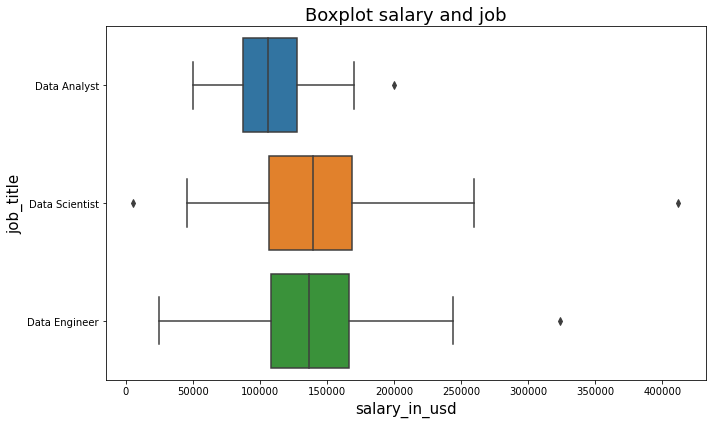

In [6]:
# check outlier in job_title and salary 
boxplot_detect_outlier('salary_in_usd', 'job_title', 'Boxplot salary and job')

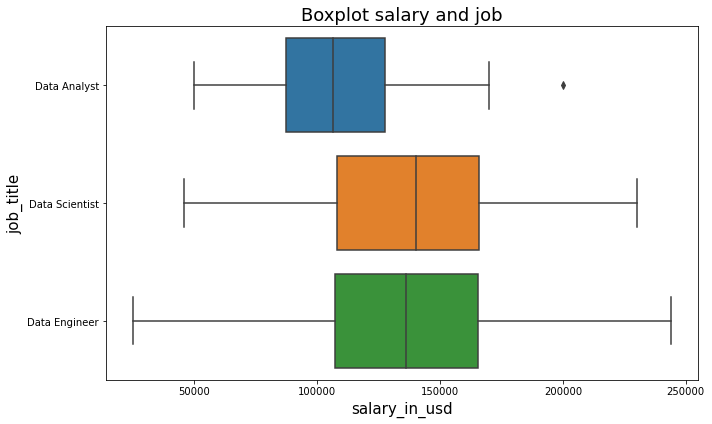

In [7]:
# Clean outlier with above or below 1.5IQR will be filter out 
# explain cirteria
q1 = ds_salaries['salary_in_usd'].quantile(0.25)
q3 = ds_salaries['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_salary = q1 - 1.5*iqr
higher_salary = q3 + 1.5*iqr
ds_salaries = ds_salaries[(ds_salaries['salary_in_usd'] > lower_salary) & \
            (ds_salaries['salary_in_usd'] < higher_salary)]

# Plot boxplot
boxplot_detect_outlier('salary_in_usd', 'job_title', 'Boxplot salary and job')

In [8]:
# Find outlier in data analyst
## last outlier is in index 233
ds_salaries[(ds_salaries['job_title'] == 'Data Analyst') & \
            (ds_salaries['salary_in_usd'] > 190000)]

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
233,SE,FT,Data Analyst,200000,100,US,L


In [9]:
# drop index 233 because it is outlier 
ds_salaries = ds_salaries.drop(233)

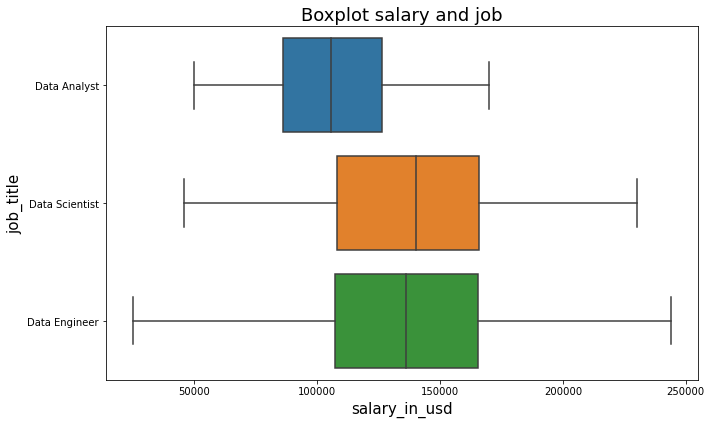

In [10]:
# boxplot after cleaned outlier
boxplot_detect_outlier('salary_in_usd', 'job_title', 'Boxplot salary and job')

#### Missing values
In section 2 dataset has no missing value

#### Outliers
Dataset has 4 outliers, I use 1.5IQR to filter out but it still has 1 outlier so I filter out by finding index.


### Section 3: Explore Salaries

In [11]:
 # Create Function label() to set label in chart
def label(xlab, ylab, title):
    """
    Create x and y axis and title labels
    
    parameters
    -----------
    xlab : string
        label x axis
    ylab : string
        label y axis
    title : string
        title chart
    """
    plt.xlabel(xlab, size=15)
    plt.ylabel(ylab, size=15)
    plt.title(title, size=18)
    plt.tight_layout()

<Figure size 720x432 with 0 Axes>

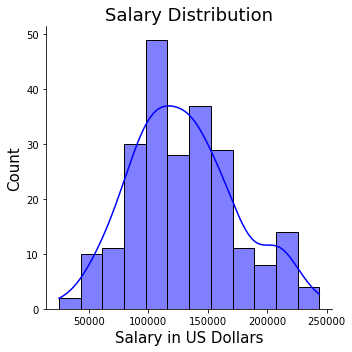

In [12]:
# Explore salary distribution 
## It quite normal distribution
sns.displot(ds_salaries['salary_in_usd'],kde=True,color='b')
label("Salary in US Dollars", "Count", "Salary Distribution")
plt.show()

In this salary Distribution chart it quite normal distribution

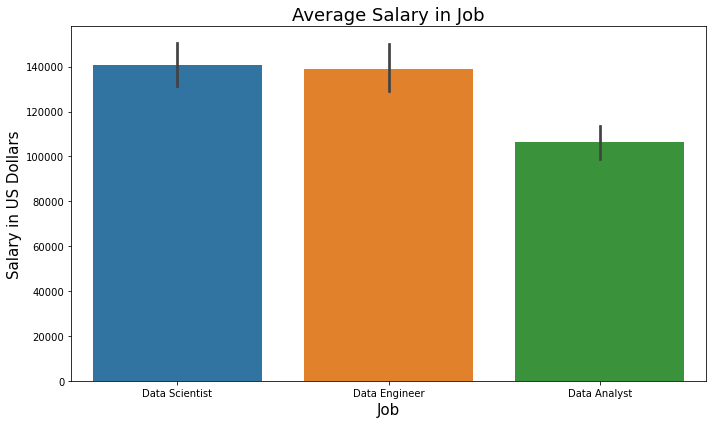

In [13]:
# Explore job with average salary
## create variable order for sort barplot
order = ds_salaries.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary_in_usd',data=ds_salaries, order=order)
label("Job", "Salary in US Dollars", "Average Salary in Job")

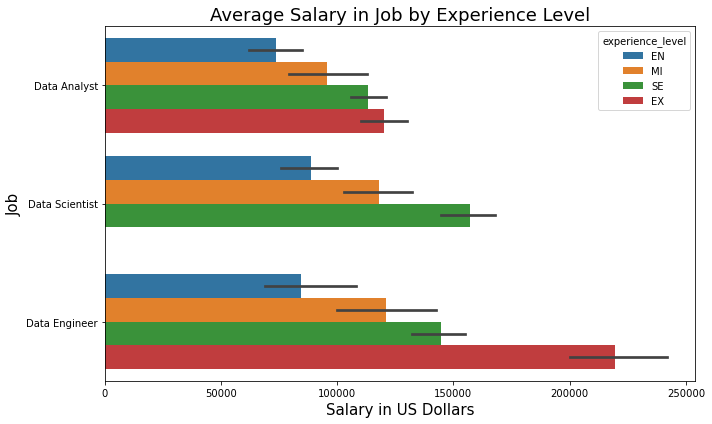

In [14]:
# Explore Salary job by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='salary_in_usd', y='job_title', hue='experience_level',data=ds_salaries)
label("Salary in US Dollars", "Job", "Average Salary in Job by Experience Level")

In average salary in job chart(chart1) Data scientist and engineer salaries are nearly same, if we look deep into experience level that show below chart1 Just only Data scientist Senior level are paid more than data engineer.    

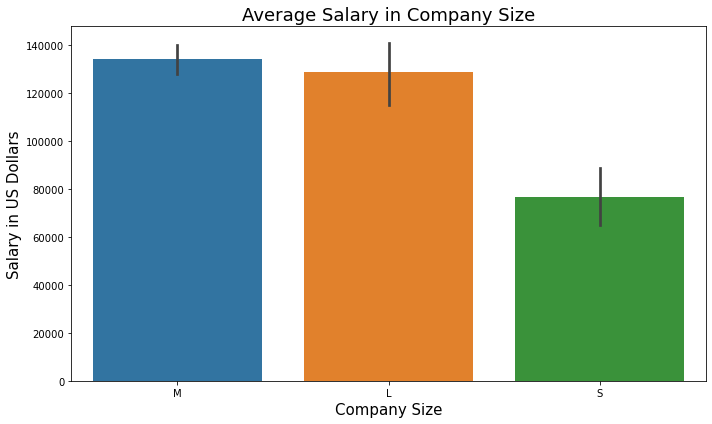

In [15]:
# Explore average salary in company size
plt.figure(figsize=(10,6))
order = ds_salaries.groupby(['company_size'])['salary_in_usd'].mean().sort_values(ascending=False).index
sns.barplot(x='company_size', y='salary_in_usd', data=ds_salaries, order=order)
label('Company Size', 'Salary in US Dollars', 'Average Salary in Company Size')

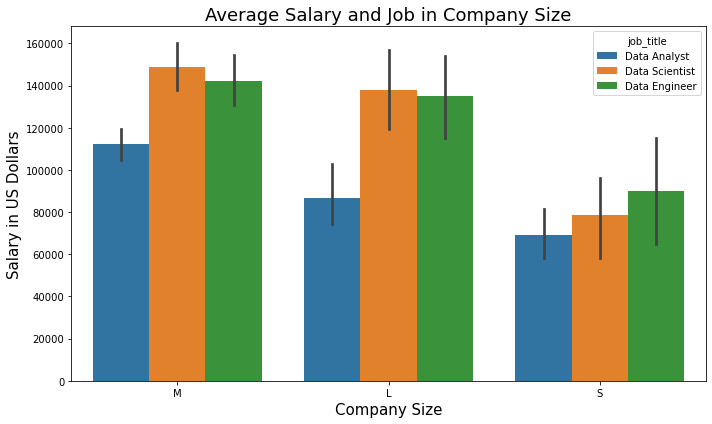

In [16]:
# Explore average salary and job in company size
plt.figure(figsize=(10,6))
order = ds_salaries.groupby(['company_size'])['salary_in_usd'].mean().sort_values(ascending=False).index
sns.barplot(x='company_size', y='salary_in_usd', hue='job_title', data=ds_salaries, order=order)
label('Company Size', 'Salary in US Dollars', 'Average Salary and Job in Company Size')

In average salary in company size showing company medium size are slightly paid more than large size, then group by job title just data analyst are significant in company medium paid more than large size.

<hr>

## Predict Data Job salary
1. use one hot encode method for prepare dataset
2. Create linear regression model using train test split method
3. Score model
4. Deploy model

### Section 1: One hot encoding

In [17]:
## Dummies variable Encoding
dummies = pd.get_dummies(ds_salaries[['job_title', 'experience_level', 'company_size']], drop_first = False)
## concat dummies df to main df
ds_salaries_dummies = pd.concat([ds_salaries, dummies], axis=1)
## reset index 
ds_salaries = ds_salaries.reset_index(drop = True)
ds_salaries_dummies.head(5)

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S
5,EN,FT,Data Analyst,72000,100,US,L,1,0,0,1,0,0,0,1,0,0
14,MI,FT,Data Analyst,85000,100,US,L,1,0,0,0,0,1,0,1,0,0
32,SE,FT,Data Scientist,68428,100,US,L,0,0,1,0,0,0,1,1,0,0
40,MI,FT,Data Scientist,45760,100,US,S,0,0,1,0,0,1,0,0,0,1
43,MI,FT,Data Engineer,106000,100,US,L,0,1,0,0,0,1,0,1,0,0


In [18]:
# Collect features and keep it in x and target in y
x = ds_salaries_dummies.drop(['experience_level', 'employment_type', 'job_title',\
                      'salary_in_usd', 'company_location', 'company_size'], axis = 1)
y = ds_salaries_dummies[['salary_in_usd']]

**prepare dataset**
- change categorical values into 0 and 1 by using one hot encode method
- store features into x and target in y

### Section 2: Create model

In [19]:
# set seed for keep values same evertime
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(186, 11)
(47, 11)


In [20]:
# Create model linear regression with train dataset
LR = LinearRegression(normalize=True)
# LR = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
LR.fit(x_train, y_train)

LinearRegression(normalize=True)

In [21]:
# pipe = Pipeline(steps=[('LR', LinearRegression())])
y_pred = LR.fit(x_train, y_train)

In [22]:
# evaluate model 
y_pred = LR.predict(x_test)

**create model by**
- **Split** data into 2 parts **Train** 80%   **Test** 20%
- train model with train dataset
- evalutate model with test dataset

### Section 3: Score model using RMSE metric

In [ ]:
# Score model using root mean square error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE = ', round(rmse, 4))

Score model by using root mean square error(rmse) and it has bad score so I think linear regression is not suitable for this datasets.

### Section 4: Deploy Model

In [24]:
predict_salary_df = pd.DataFrame(columns = x_train.columns)
def predict_data_salary():
    """
    Predict data salary in US
    This function does not receive any argument
    but will ask for input 
    """
    #remote_ratio
    try:
        remote = int(input('Remote ratio:0 No remote work (less than 20%) \
        \n 50 Partially remote \
        \n 100 Fully remote (more than 80%): '))
        remote_code = [remote]
    except:
        print('Wrong value!!')
        return None
    #job_title
    job = int(input('Job title: Data Analyst is 1 \
    \n Data Engineer is 2 \
    \n Data Scientist is 3: '))
    if job == 1: # Data Analyst
        job_code = [1, 0, 0]
    elif job == 2: # Data Engineer
        job_code = [0, 1, 0]
    elif job == 3: # Data Scientist
        job_code = [0, 0, 1]
    else:
        print('wrong value!!')
        return None
    #experience_level
    ex_level = int(input('Experience Entry-level is 1\
    \n MI Mid-level is 2\
    \n SE Senior-level is 3\
    \n EX Executive-level is 4: '))
    if ex_level == 1:
        ex_level_code = [1, 0, 0, 0]
    elif ex_level == 2:
        ex_level_code = [0, 0, 1, 0]
    elif ex_level == 3:
        ex_level_code = [0, 0, 0 , 1]
    elif ex_level == 4:
        ex_level_code = [0, 1, 0 , 0]
    else:
        print('wrong value!!')
        return None
    #company_size
    com_size = int(input('S less than 50 employees (small) is 1 \
    \n M 50 to 250 employees (medium) is 2\
    \n L more than 250 employees (large) is 3: '))
    if com_size == 1:
        com_size_code = [0, 0, 1]
    elif com_size == 2:
        com_size_code = [0, 1, 0]
    elif com_size == 3:
        com_size_code = [1, 0, 0]
    else:
        print('wrong value!!')
        return None
    dependent_var = remote_code + job_code + ex_level_code + com_size_code
    predict_salary_df.loc[0] = dependent_var
    predicted = LR.predict(predict_salary_df)
    salary_us = "{:,}".format(round(predicted.item(0), 0))
    salary_th = "{:,}".format(round(predicted.item(0) * 35/12, 0))
    print(f'Your predicted salary around {salary_us} US dollars per year')
    print(f'Or {salary_th} baht per month')

Pretend it's a good model for study how to deploy model for predict data salary in us

#### Let's predict your salary

In [ ]:
predict_data_salary()

<hr>

## Key Findings:
DS and DE in Company medium and large size don't have differently salaries in experience more than entry level.

## What's Next / Recommendation:
1. Find more feature that are numeric values
2. use another model to find most accurate

## Finnacial Benefit:
Now! We can negotiate the right salary when we apply for a job in United State.